<a href="https://colab.research.google.com/github/EsserMishelle/DataScience/blob/main/Housing_Prices_King_County_MishelleEsser_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Predicting Housing Prices in King County
# Due 12/14 EOD

## Dataset
We will use the **King County House Sales dataset**:  
[House Sales Prediction (Kaggle)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

- Contains information on **21,613 house sales** in King County, Washington (includes Seattle).
- Features include:
  - Square footage of living space and lot
  - Number of bedrooms and bathrooms
  - Floors, waterfront view, condition, grade
  - Year built and year renovated
  - Geographic location (latitude, longitude, zip code)
- Target variable: **Sale Price**

---

## Project Goal
- Build regression models to **predict housing prices** based on property features.
- Compare **Linear Regression, Ridge Regression, and Lasso Regression**.
- Evaluate models using metrics:
  - **R²** (variance explained)
  - **MAE** (mean absolute error)
  - **RMSE** (root mean squared error)

---

## Why This Matters
- Housing prices are influenced by many factors: size, location, condition, and more.
- Regression helps us **quantify relationships** and make predictions.
- This project connects data science techniques to a **real-world problem** in economics and urban planning.

---

## Deliverables
1. **Data Exploration**  
   - Summary statistics, distributions, correlations.
2. **Model Building**  
   - Fit Linear, Ridge, and Lasso regression models.
3. **Model Evaluation**  
   - Report R², MAE, RMSE for each model.
   - Interpret coefficients (which features matter most).
4. **Reflection**  
   - Discuss overfitting, regularization, and practical insights.

---

## Key Takeaway
By the end of this project, you will:
- Understand how regression applies to real-world housing data.
- Gain hands-on experience with **model building and evaluation**.
- Be able to explain trade-offs between different regression approaches.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Import the dataset and look at the first 25 rows of the dataset.
housing = pd.read_csv('kc_house_data.csv')
housing.head(25)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [45]:
# Before we do anything, we need to inspect the datatype, look at statistic description, the unique values and the null values.
display(housing.shape)
display(housing.info())



(21613, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

In [46]:
view = housing['view'].unique()
print(f'Unique values in view are: {view}')

waterview= housing['waterfront'].unique()
print(f'Unique values in waterview are: {waterview}')

Unique values in view are: [0 3 4 2 1]
Unique values in waterview are: [0 1]



## Discovery:
 1. The 'date' feature is an object type, and may need to be converted to date type (depening on futher analysis)
 2. Bathrooms are float type
 3. Both 'waterfront' and 'view' are integer type. 'View' is categorical and 'waterfront' is actually binary.

In [47]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [48]:
housing.isnull().sum()
# No null values anywhere in this dataset.

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [129]:
# We will look at the correlation between columns with numberic features
# and the price feature

house_corr= housing.corr(numeric_only=True).round(3)
house_corr

house_price_corr= housing.corr(numeric_only=True)['price'].sort_values(ascending=False).round(3)
house_price_corr

,price
price,1.000
sqft_living,0.702
grade,0.667
sqft_above,0.606
sqft_living15,0.585
bathrooms,0.525
view,0.397
sqft_basement,0.324
bedrooms,0.308
lat,0.307



According to this dataset, house price is mostly related to sqft_living (.7), grade (.67) and sqft_above(0.61) and least related to longtitude (0.022) and condition (.0036)

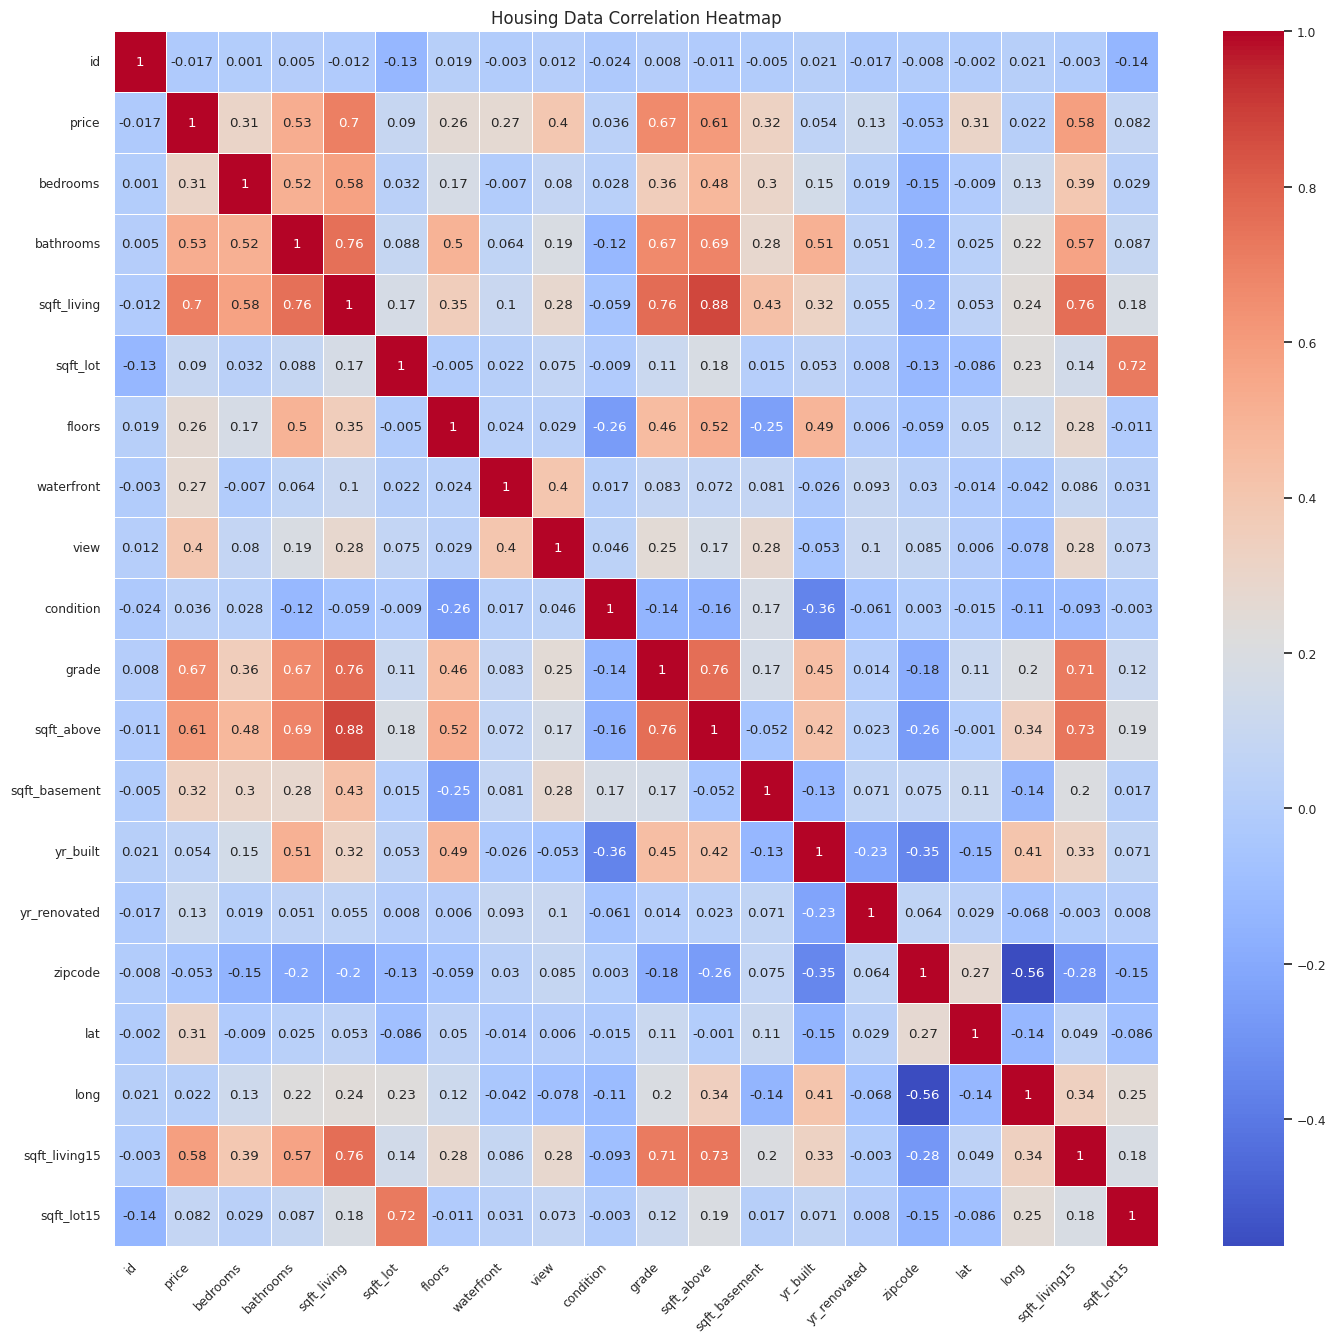

In [130]:
# Using heatmap, we will chart the correlations of all the features

plt. figure(figsize=(15,15))
sns.set(font_scale=0.8) # Too crowded so I decreased the font size
ax=sns.heatmap(house_corr, cmap='coolwarm', annot=True, linewidths = 0.5, cbar =True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Housing Data Correlation Heatmap', fontsize = 12)

plt.show()



## Since the objective of this study is mainly to predict housing price based on property features, I will focus more based on the correlations between price and key features.

---

## **Let's do some individual charting based on the most related key features.**

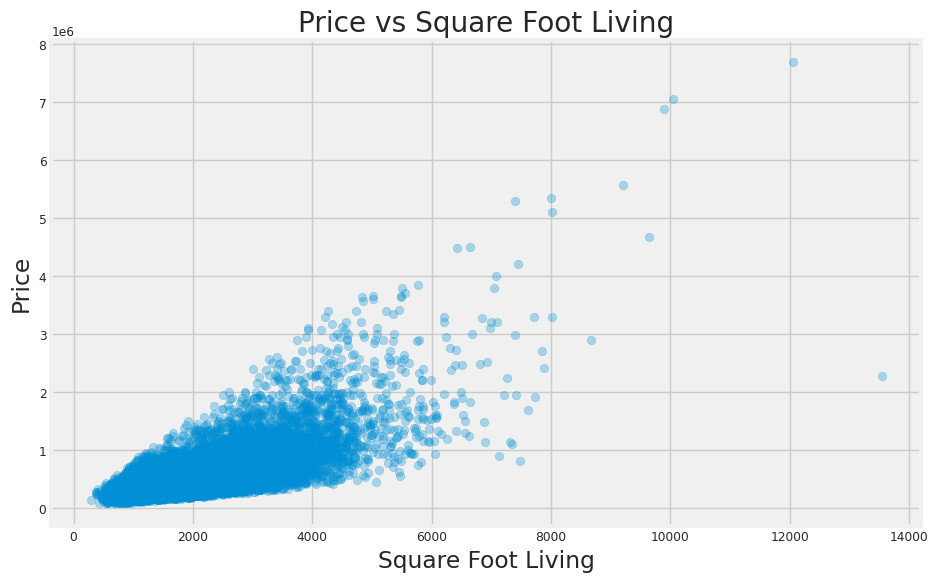

In [131]:
# from matplotlib import colormaps
# Price vs Square Foot Living

plt.figure(figsize =(10, 6))
plt.style.use('fivethirtyeight')
plt.scatter(housing['sqft_living'], housing['price'], alpha=0.3)
plt.xlabel('Square Foot Living')
plt.ylabel('Price')
plt.title('Price vs Square Foot Living')
plt.show()

Discovery:

Apart from extreme values, there is a strong positive correlation between living/livable square footage and price.
The square foot living (sqft_living)is mostly concentrated < 4500 sqt

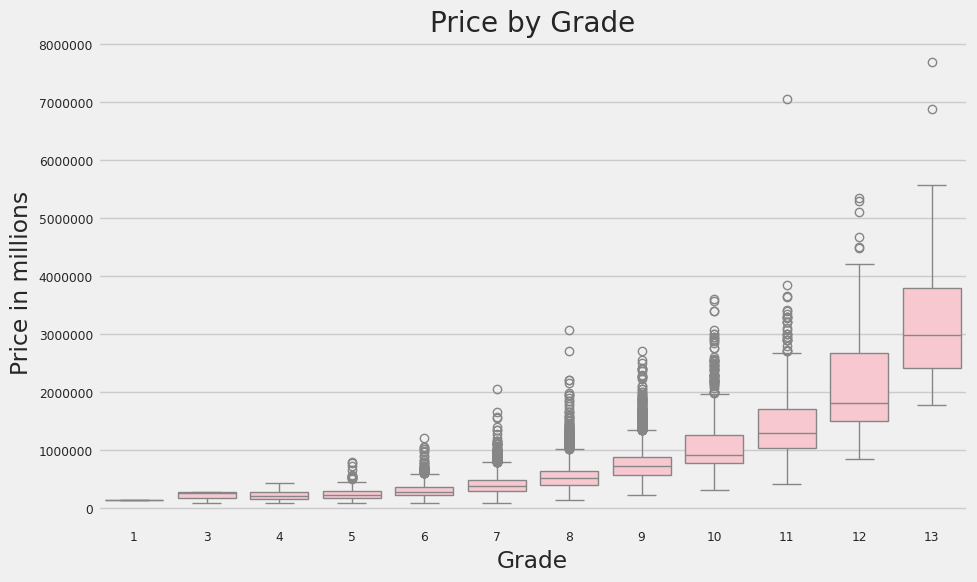

In [89]:
# Since grade is the 2nd storngest correlated feature, let's do a boxplot of
# price by grade.
# Even though grade is a int datatype, it is categorical in nature, (categorical -> price)

plt.figure(figsize =(10,6))
plt.style.use('fivethirtyeight')

sns.boxplot(x='grade', y='price', data= housing, color='pink')

plt.title('Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Price in millions')
plt.ticklabel_format(style='plain', axis='y')

plt.show()


Discovery:


* Price goes go up gently with each grade level until grade 8
* After grade 8, the price incremental more dramastically
* After grade 10, the price doubles that of grade 8
* After grade 11, the price increases sustaintially, almost doubling that of grade 11

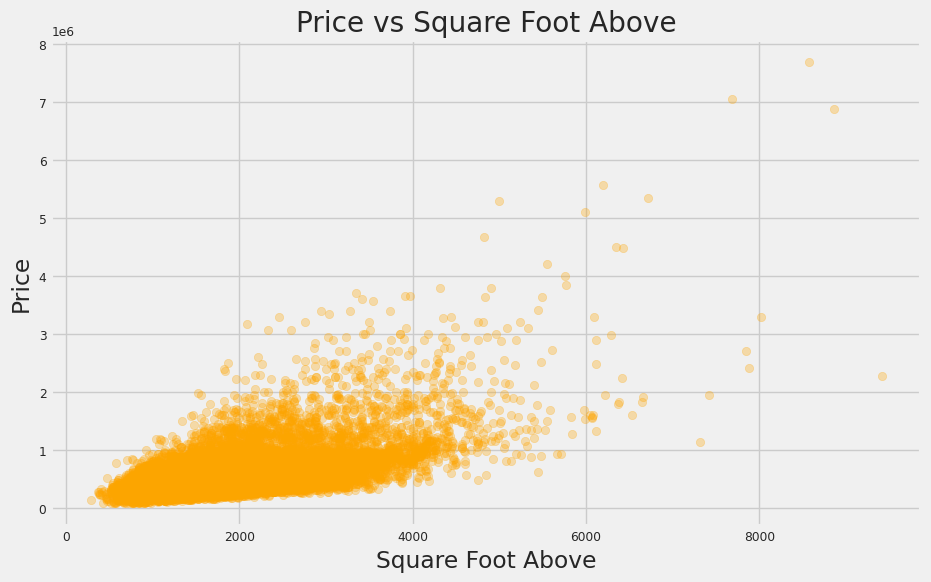

In [132]:
# price vs square foot above

plt.figure(figsize =(10, 6))
plt.style.use('fivethirtyeight')
plt.scatter(housing['sqft_above'], housing['price'], alpha=0.3, color='Orange')
plt.xlabel('Square Foot Above')
plt.ylabel('Price')
plt.title('Price vs Square Foot Above')
plt.show()

- Again, there is a gentler positive relationship between the square foot above and price.

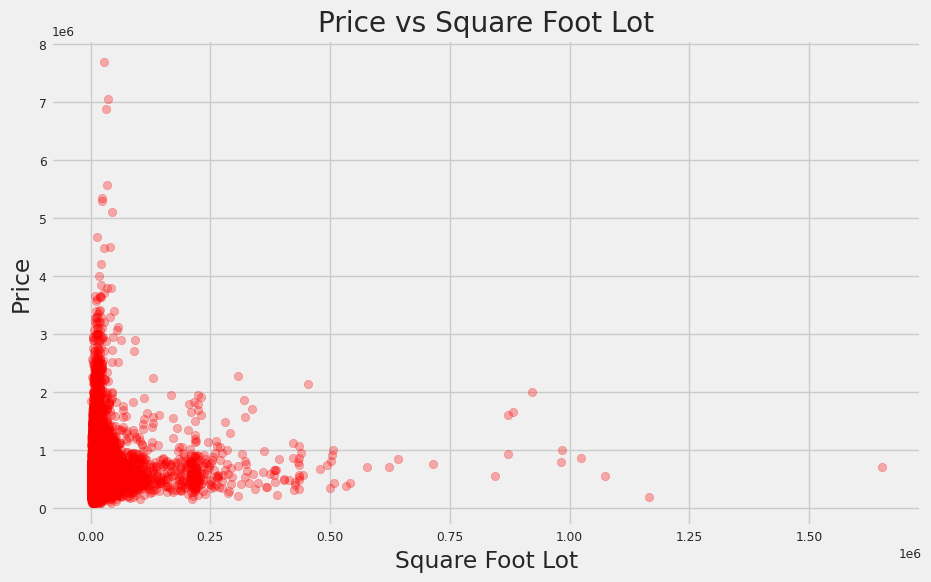

In [135]:
# Sqft_lot might be an useful feature so we want to explore it
plt.figure(figsize =(10, 6))
plt.style.use('fivethirtyeight')
plt.scatter(housing['sqft_lot'], housing['price'], alpha=0.3, color='red')
plt.xlabel('Square Foot Lot')
plt.ylabel('Price')
plt.title('Price vs Square Foot Lot')
plt.show()

There is very little correlation between square foot lot and price.

Skewness: 4.024069144684712
Kurtosis: 34.58554043194243


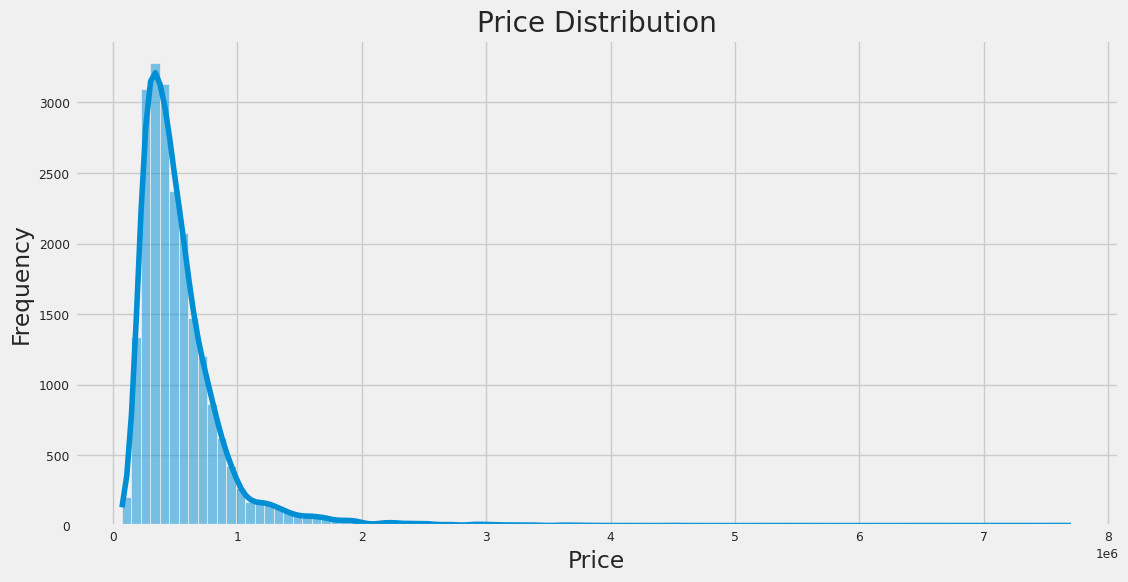

In [136]:
# Determine whether that the target variable is skewed and if so, how skewed is it.
# Let find out about the price sns.distributions by uing a histogram

plt.figure(figsize= (12,6))
sns.histplot(housing['price'], bins=100, kde=True, color='C0')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# let's find the skewness and the tail in metrics
print(f'Skewness: {housing["price"].skew()}')
print(f'Kurtosis: {housing["price"].kurt()}')

## Discovery:

### The chart below shows a highly-skewed curve
### Skewness is =4.02, which is above the normal -1 to +1 range
- Most house prices are clustered at the lower end
- A righ long tail indicated a very small number of extreamely expensive homes
- The mean is inflated because of the outliers

### Kurtosis = 34.59, which is much higher than normal range of 3 (heavy tails)
- The tail is not long but very heavy
- The rare and yet extreamely expensive house prices increase the kurtosis

### Price is highly right-skewed with extreme but valid values. Very strong positve relationships between price and square footage, grade and square above.
Scatter plots indicate increasing variance at higher values, suggesting potential sensitivity to extreme feature values.

In [137]:
# Take a look at the IQR
housing_q1 = housing['price'].quantile(.25)
housing_q3 = housing['price'].quantile(.75)
print(f'25% House price are below: ${housing_q1}, 75% House price are below: ${housing_q3}')

iqr_price = housing_q3 - housing_q1
lower_bound_price = housing_q1 - (1.5 * iqr_price)
upper_bound_price = housing_q3 + (1.5 * iqr_price)

print(f'The house price range from 25% to 75% are: {iqr_price}')
print(f'The lower bound is: {lower_bound_price}')
print(f'The upper bound is: {upper_bound_price}')


25% House price are below: $321950.0, 75% House price are below: $645000.0
The house price range from 25% to 75% are: 323050.0
The lower bound is: -162625.0
The upper bound is: 1129575.0



## Discovery:
- The negative lower bound reflects strong right-skewed in prices.
- These extreme values are due to the expensive properties and were therefore retained. The model can benefit from a log transformation to smooth the unbalanced skewness.

## Baseline Model


---



We will build a baseline linear regression model using a selected set of strong,
indicators based on correlation analysis and domain knowledge. No winsorization or transformation was involved. This baseline model will be a reference point for evaluating the impact of our following steps.

In [138]:
# Baseline model1
# This model uses a more predictors

import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

baseline_features = [
    'sqft_living',
    'grade',
    'sqft_above',
    'sqft_lot',
    'sqft_basement',
    'view',
    'waterfront',
    'bedrooms',
    'bathrooms',
    'floors',
    'lat',
    'long',
    'condition'
]

X = housing[baseline_features]
y = housing['price']

# split the train/test at 75/25
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.25, random_state=42)

#  We should scale some features such as, sqft_living (thousands),
# and grade (small integers), before fitting our models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit baseline linear regression
baseline_lr = LinearRegression()
baseline_lr.fit(X_train_scaled, y_train)

# Define a function that returns R2, MSE, RMSE training and test dataset
def evaluate_model(model, X_train, X_test, y_train, y_test):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  return {
      'R2 Train': r2_score(y_train, y_pred_train),
      'R2 Test': r2_score(y_test, y_pred_test),

      'MAE Train': mean_absolute_error(y_train, y_pred_train),
      'MAE Test': mean_absolute_error(y_test, y_pred_test),

      'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
      'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
  }

baseline_result = evaluate_model(baseline_lr, X_train_scaled, X_test_scaled, y_train,
                                 y_test)
baseline_result

{'R2 Train': 0.6702268260006988,
 'R2 Test': 0.6820492575596702,
 'MAE Train': 131153.14757029546,
 'MAE Test': 132934.94766737567,
 'RMSE Train': np.float64(206901.11883190504),
 'RMSE Test': np.float64(218085.98352958105)}

# Due to the strong right-skewness in housing prices, we can try appling a log transformation to the target variable

In [139]:
# Features/target
X = housing[baseline_features]
y = housing['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size =0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Log-transform the target
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Fit and train
log_baseline_lr = LinearRegression()
log_baseline_lr.fit(X_train_scaled, y_train_log)

# Predict
y_pred_log_test = log_baseline_lr.predict(X_test_scaled)
y_pred_price_test = np.exp(y_pred_log_test) # convert back to dollor prices

def evaluate_log_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = np.exp(model.predict(X_train))
    y_pred_test = np.exp(model.predict(X_test))

    return {
        'R2 Train': r2_score(y_train, y_pred_train),
        'R2 Test': r2_score(y_test, y_pred_test),

        'MAE Train': mean_absolute_error(y_train, y_pred_train),
        'MAE Test': mean_absolute_error(y_test, y_pred_test),

        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    }

log_results = evaluate_log_model(log_baseline_lr, X_train_scaled, X_test_scaled, y_train, y_test)
log_results


{'R2 Train': 0.6852057855982401,
 'R2 Test': 0.35661529790389956,
 'MAE Train': 116433.37333105014,
 'MAE Test': 123502.42803362448,
 'RMSE Train': np.float64(202147.58064415742),
 'RMSE Test': np.float64(310229.57484683685)}

## Discovery:

I tried to apply a log transformation to the target variable to correct right skewness in housing prices.
* The training performance improved very slightly, but test performance deterioated significantly.
* There was a large increase in RMSE_test and a sharp drop in R2_test. This indicates reduced generalization, suggesting that the baseline linear model works better for this dataset.
* We will use the baseline model from now on.

## We can also improve the model by winsorize data in some features.
###  We want features that are:
   * continuous numberic variables
   * contain extreme but valid values (not known outliers)
   * will impact co-efficients

### We won't slect features that are:
  * ordinal or categorical encoding ('grade', 'view')
  * binary ('waterfront')
  * geographical location ('lat', 'long')
  * do not have extreme values
  * have low impacts on co-efficients
  
### We will use 'sqft_living' and 'sqft_lot' for our winsorization features.



In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Thresholds to test
thresholds = [
    (0.01, 0.99),
    (0.03, 0.97),
    (0.05, 0.95),
    (0.07, 0.93),
    (0.075, 0.9225),
    (0.10, 0.90),
    (0.15, 0.85),
    (0.20, 0.80),
  ]

# These are the columns to winsorize.
winsor_cols = [
    'sqft_living',
    'sqft_lot',
  ]

def winsorize_series(s, lower_q, upper_q):
    lower = s.quantile(lower_q)
    upper = s.quantile(upper_q)
    return s.clip(lower=lower, upper=upper)

results = []

# Make a copy of the columns we want to winsorize
for lower_q, upper_q in thresholds:
    # Make a copy of the columns we want to winsorize
    housing_temp = housing.copy()

    # apply winsorization
    for col in winsor_cols:
        housing_temp[col] = winsorize_series(housing_temp[col], lower_q, upper_q)

    X = housing_temp[baseline_features]
    y = housing_temp['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    # Scaling
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)

    # Linear Regression model
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)

    y_pred_test = lr.predict(X_test_scaled)
    y_pred_train = lr.predict(X_train_scaled)

    results.append({
        'lower_q': lower_q,
        'upper_q': upper_q,
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test),
        'mae_train': mean_absolute_error(y_train, y_pred_train),
        'mae_test': mean_absolute_error(y_test, y_pred_test),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    })

results_housing = pd.DataFrame(results)
results_housing

,lower_q,upper_q,r2_train,r2_test,mae_train,mae_test,RMSE Train,RMSE Test
0,0.010,0.9900,0.699544,0.671263,126695.207074,129890.911022,197490.244296,221754.442967
1,0.030,0.9700,0.700548,0.692017,125549.615631,128599.995212,197159.972509,214640.315308
2,0.050,0.9500,0.701765,0.697984,125154.527135,128252.037872,196758.913050,212550.847766
3,0.070,0.9300,0.701650,0.699913,125223.531099,128443.444049,196796.847404,211871.038670
4,0.075,0.9225,0.701962,0.700356,125065.021780,128326.433119,196694.090248,211714.524912
5,0.100,0.9000,0.700760,0.700814,125453.820088,128645.526409,197090.191060,211552.514866
6,0.150,0.8500,0.698620,0.700548,126176.561410,129181.834393,197793.553342,211646.731287
7,0.200,0.8000,0.696868,0.699856,126513.505317,129478.041918,198367.673825,211890.931345


## Discovery:
- After winsorizing a set of threashold to the whole housing dataset, we now can compare model performance.
- The R2_train and R2_test are relatively similar. MAE_train and MAE_test show consistent underfitting. RMSE_train and RMSE_test demonstrate the most underfitting.
- The 10/90 percentile produces the best performace for R2_test (0.701), RMSE_test (212k). MAE_test could use a better tuning (129k).
- The baseline model produces slightly inferior results. The baseline model results are: R2_test (0.682), RMSE_test (218k) and MAE_test (132K). But it does has a smaller difference between RMSE_train and RMSE_test.

- Moderate winsorization (around 10/90th percentiles) consistently improved test-set performance, reducing RMSE and increasing R2 comparing to untransformed baseline.
- Performance gains decreases beyond this ratio, indicating that light-to-moderate capping might reduced noise and increase model result.

## The models forwards will use the 10th/90th percentile threshold for winsorization



In [142]:
# Determine the rows impacted with the winsorization

high_price= housing['price'].quantile([ 0.95, 0.97, 0.99 ])
high_price
print(f'House price above 85% has: {housing[housing['price'] > high_price[0.95]].shape[0]} rows')
print(f'House price above 90% has: {housing[housing['price'] > high_price[0.97]].shape[0]} rows')
print(f'House price above 95% has: {housing[housing['price'] > high_price[0.99]].shape[0]} rows')

House price above 85% has: 1081 rows
House price above 90% has: 648 rows
House price above 95% has: 217 rows


## Discovery:
- Using 10/90 percentile, we will modify 2 features on 648 rows on a dataset of 21613 rows.




# Model Building
## Project Goal
- Build regression models to **predict housing prices** based on property features.
- Compare **Linear Regression, Ridge Regression, and Lasso Regression**.
- Evaluate models using metrics:
  - **R²** (variance explained)
  - **MAE** (mean absolute error)
  - **RMSE** (root mean squared error)


---

# Linear Regression Model

In [143]:
# Linear Regression Modeling in these steps:
# split-train test, winsorize, scale, then model to prevent data leakage

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Split
X = housing[baseline_features]
y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Copy train and test dataset
X_train_winsor = X_train.copy()
X_test_winsor = X_test.copy()

# Winsorizing TRAIN data using selected quantiles
winsor_cols = [ 'sqft_living', 'sqft_lot' ]

for col in winsor_cols:
    upper = X_train_winsor[col].quantile(0.90)
    lower= X_train_winsor[col].quantile(0.10)

    X_train_winsor[col] = X_train[col].clip(lower=lower, upper=upper)
    X_test_winsor[col] = X_test[col].clip(lower=lower, upper=upper)

# Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_winsor)
X_test_scaled = ss.transform(X_test_winsor)

# results = []

# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

results = pd.DataFrame([{
  'lower_quantile': lower,
  'upper_quantile': upper,
  'r2_train': r2_score(y_train, y_pred_train),
  'r2_test': r2_score(y_test, y_pred_test),
  'mae_train': mean_absolute_error(y_train, y_pred_train),
  'mae_test': mean_absolute_error(y_test, y_pred_test),
  'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
  'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
}])

results


,lower_quantile,upper_quantile,r2_train,r2_test,mae_train,mae_test,RMSE Train,RMSE Test
0,3270.2,21324.0,0.700777,0.700883,125445.020925,128630.704929,197084.523961,211528.113979


In [144]:
pd.Series(y_pred_test).describe()

,0
count,5.404000e+03
mean,5.449877e+05
std,3.286071e+05
min,-2.355349e+05
25%,3.610377e+05
50%,4.904891e+05
75%,6.433997e+05
max,5.110010e+06


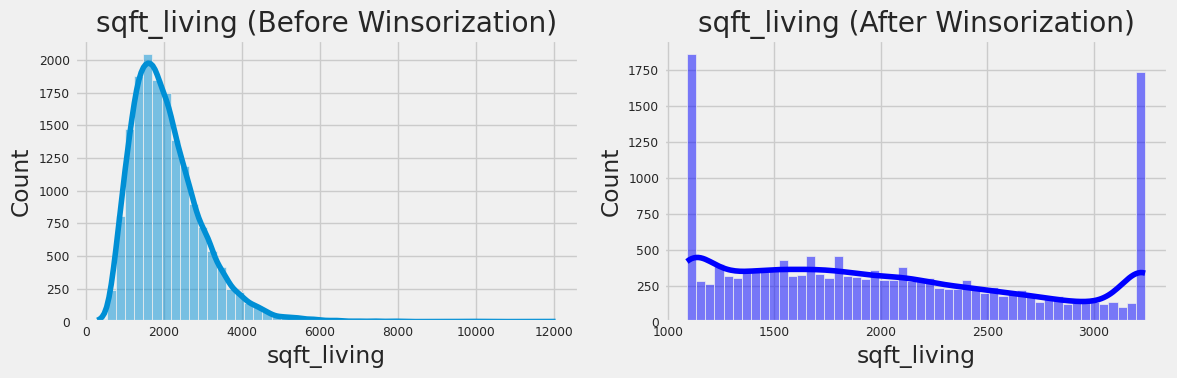

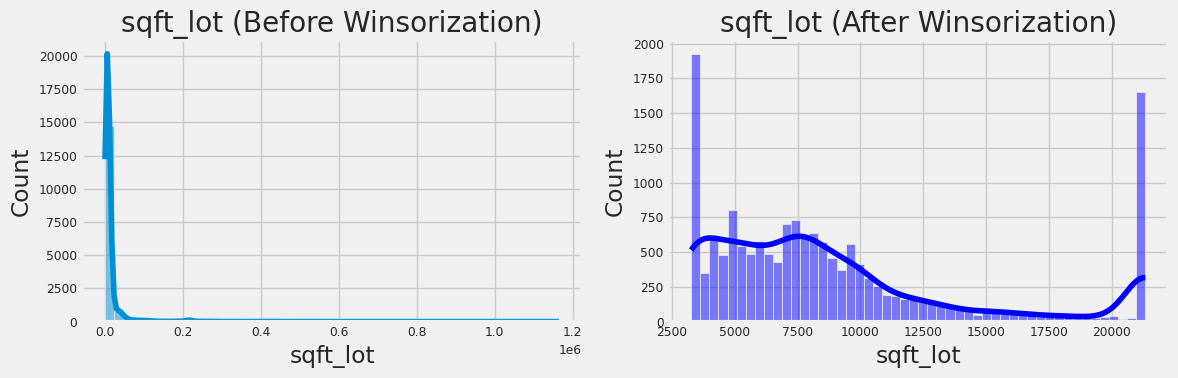

,feature,skew_before,skew_after,kurtosis_before,kurtosis_after
0,sqft_living,1.378634,0.385597,4.25563,-1.043976
1,sqft_lot,11.406146,1.183409,209.10870,0.422271


In [145]:
# Inspect the plot before vs after
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['sqft_living', 'sqft_lot']

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(X_train[col], bins=50, ax=axes[0], kde=True)
    axes[0].set_title(f'{col} (Before Winsorization)')

    sns.histplot(X_train_winsor[col], bins=50, ax=axes[1], kde=True, color='Blue')
    axes[1].set_title(f'{col} (After Winsorization)')

    plt.tight_layout()
    plt.show()

stats = []

for col in cols:
    stats.append({
        'feature': col,
        'skew_before': skew(X_train[col]),
        'skew_after': skew(X_train_winsor[col]),
        'kurtosis_before': kurtosis(X_train[col], fisher=True),
        'kurtosis_after': kurtosis(X_train_winsor[col], fisher=True),
    })

skew_kurt_df = pd.DataFrame(stats)
skew_kurt_df




## Discovery:
### Comparing the original 'sqrt_living' & 'sqrt_lot' and their applicable winsorized columns -
- the highest and lowest ends have been pushed to the 2 sides, which are the cut-off thresholds
- the scaling is more magnified on a smaller range, indicated by the x- and y-ax labels.
- The both curve look better on the winsorized linear regression charts & both the skewness and kurtosis improved
- sqft_living
* Skewness goes down, Kurtosis is now around the range of +- 1 Std
- sqft_lot
* Skewness goes down significantly and around +-= 1 Std, Kurtosis is now around the range of +- 1 Std

In [65]:
print(y_test.describe())
print(pd.Series(y_pred_test).describe())

count    5.404000e+03
mean     5.479403e+05
std      3.868014e+05
min      7.800000e+04
25%      3.249500e+05
50%      4.506500e+05
75%      6.554562e+05
max      5.570000e+06
Name: price, dtype: float64
count    5.404000e+03
mean     5.449877e+05
std      3.286071e+05
min     -2.355349e+05
25%      3.610377e+05
50%      4.904891e+05
75%      6.433997e+05
max      5.110010e+06
dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


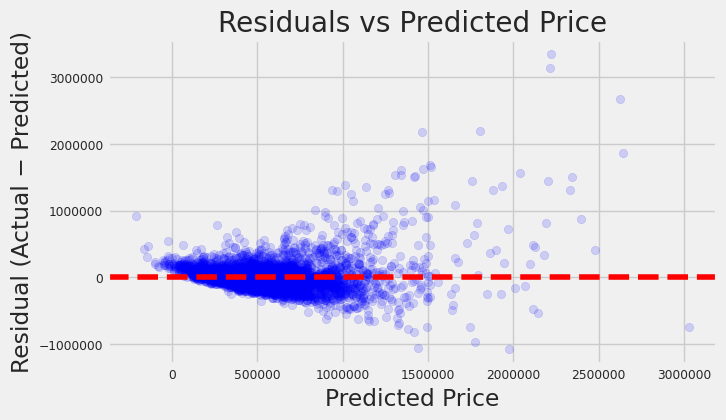

In [88]:
# # I like to know where the predicted errors happen.
y_pred_test = lr.predict(X_test_scaled)
residuals = y_test - y_pred_test

plt.figure(figsize=(7, 4))
plt.scatter(y_pred_test, residuals, alpha=0.15, color='Blue')
plt.axhline(0, color='red', linestyle='--')
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual − Predicted)')
plt.title('Residuals vs Predicted Price')
plt.show()


## Discovery:
- The residuals are centered around zero, with most errors occuring predicted 0-125K price range. Error magnitude start to increase inidcating sensitivity to extreme values.
- It shows linear regression does benefit from winsorization but it still does not solve the variance due to high price range.
- Regularization such as Lasso or Ridge regression maybe needed to reduce variance.


---
Lasso Regression


In [146]:
# Lasso Regression Modeling in these steps:
# split-train test, winsorize, scale, then model to prevent data leakage

from sklearn.linear_model import LassoCV

# Split
X = housing[baseline_features]
y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Copy train and test dataset
X_train_winsor = X_train.copy()
X_test_winsor = X_test.copy()

# Winsorizing TRAIN data using selected quantiles
winsor_cols = [ 'sqft_living', 'sqft_lot' ]

for col in winsor_cols:
    upper = X_train_winsor[col].quantile(0.90)
    lower= X_train_winsor[col].quantile(0.10)

    X_train_winsor[col] = X_train[col].clip(lower=lower, upper=upper)
    X_test_winsor[col] = X_test[col].clip(lower=lower, upper=upper)

# Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_winsor)
X_test_scaled = ss.transform(X_test_winsor)

# Lasso Regression model  # We use this in class
# lasso = Lasso(alpha=0.9, max_iter=20000)
# lasso.fit(X_train_scaled, y_train)

# # Predict and Evaluate
# y_pred_train = lasso.predict(X_train_scaled)
# y_pred_test = lasso.predict(X_test_scaled)

# # LassoCross Validation Regression model --more balanced Lasso
lassoCV = LassoCV(alphas=np.logspace(-4,1,30), cv=5, max_iter=20000,
                  random_state=42)
lassoCV.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_train = lassoCV.predict(X_train_scaled)
y_pred_test = lassoCV.predict(X_test_scaled)

results = pd.DataFrame([{
  'lower_quantile': lower,
  'upper_quantile': upper,
  'r2_train': r2_score(y_train, y_pred_train),
  'r2_test': r2_score(y_test, y_pred_test),
  'mae_train': mean_absolute_error(y_train, y_pred_train),
  'mae_test': mean_absolute_error(y_test, y_pred_test),
  'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
  'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
}])

results

,lower_quantile,upper_quantile,r2_train,r2_test,mae_train,mae_test,RMSE Train,RMSE Test
0,3270.2,21324.0,0.700777,0.700883,125445.020886,128630.704881,197084.523961,211528.113922


- Lasso (R2_test= 0.701885) or LassoCV regularization (R2_test= 0.700883) does not improve predicitive performance over the baseline linear model for this dataset.
- LassoCV R2 < Lasso R2 slightly.
- However, Lasso Cross Validation offers the best practice and avoid underfitting.
- The baseline feature set is already strong (sqft, grades, rooms etc).
- Regularization probably won't improve much.

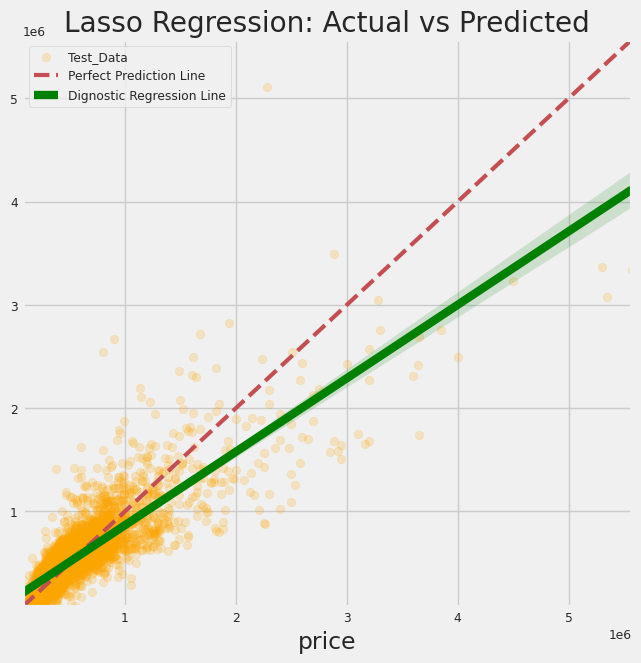

In [120]:
# Plot the Lasso scaled Regression

y_pred_housing_lasso = lassoCV.predict(X_test_scaled)

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred_housing_lasso, alpha = 0.2, label = 'Test_Data', color='Orange')

    # Need to have 2D points because we are not just testing 1 feature but
    # multiple features
    # with the min/max on y data forming 2 points so we can draw a line

  # set axis limits first and then plot the line to make the dots look clearner
    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])

    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
    'r--', linewidth=3, label='Perfect Prediction Line')

  # Plot the diagnostic regression line
    sns.regplot(x=y_test, y=y_pred_housing_lasso, scatter=False, color='green',
                label= 'Dignostic Regression Line')
    plt.title("Lasso Regression: Actual vs Predicted")
    plt.legend()
    plt.show()

Ridge Regression Model


---



In [118]:
# Ridge regression

# Ridge Regression Modeling in these steps:
# split-train test, winsorize, scale, then model to prevent data leakage

# Split
X = housing[baseline_features]
y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Copy train and test dataset
X_train_winsor = X_train.copy()
X_test_winsor = X_test.copy()

# Winsorizing TRAIN data using selected quantiles
winsor_cols = [ 'sqft_living', 'sqft_lot' ]

for col in winsor_cols:
    upper = X_train_winsor[col].quantile(0.90)
    lower= X_train_winsor[col].quantile(0.10)

    X_train_winsor[col] = X_train[col].clip(lower=lower, upper=upper)
    X_test_winsor[col] = X_test[col].clip(lower=lower, upper=upper)

# Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_winsor)
X_test_scaled = ss.transform(X_test_winsor)


# Lasso Regression model
ridge = Ridge(alpha=0.9)
ridge.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

results = pd.DataFrame([{
  'lower_quantile': lower,
  'upper_quantile': upper,
  'r2_train': r2_score(y_train, y_pred_train),
  'r2_test': r2_score(y_test, y_pred_test),
  'mae_train': mean_absolute_error(y_train, y_pred_train),
  'mae_test': mean_absolute_error(y_test, y_pred_test),
  'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
  'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
}])

results

,lower_quantile,upper_quantile,r2_train,r2_test,mae_train,mae_test,RMSE Train,RMSE Test
0,3270.2,21324.0,0.700777,0.700906,125443.169424,128627.938659,197084.544958,211520.227365


- Ridge Regression performs slightly better on R2_test with barely any underitting for R2_test.
- MAE has a similar underfit difference as the other 2 models, and RMSE still has the largest underfit among R2, MAE, and RMSE. Ridge also has the biggest discrpenecy between RMSE_train and RMSE_test among the 3 models.

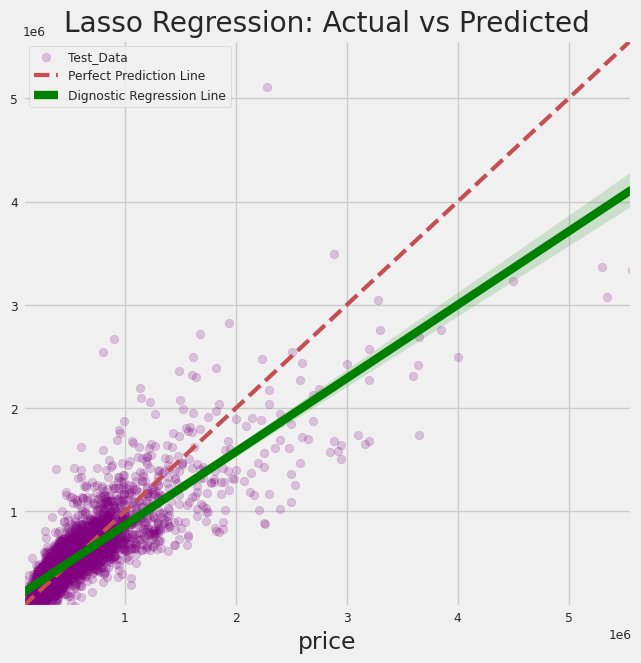

In [147]:
# Plot the Ridge scaled Regression

y_pred_housing_ridge = ridge.predict(X_test_scaled)

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred_housing_ridge, alpha = 0.2, label = 'Test_Data', color='Purple')

    # Need to have 2D points because we are not just testing 1 feature but
    # multiple features
    # with the min/max on y data forming 2 points so we can draw a line

  # set axis limits first and then plot the line to make the dots look clearner
    plt.xlim([y_test.min(), y_test.max()])
    plt.ylim([y_test.min(), y_test.max()])

    plt.plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
    'r--', linewidth=3, label='Perfect Prediction Line')

  # Plot the diagnostic regression line
    sns.regplot(x=y_test, y=y_pred_housing_ridge, scatter=False, color='green',
                label= 'Dignostic Regression Line')
    plt.title("Lasso Regression: Actual vs Predicted")
    plt.legend()
    plt.show()

In [154]:
# Let's see how many features Lasso removed: 0
print(f'LassoCV removes {(lassoCV.coef_ == 0).sum()} features')

# comparing coeff
pd.DataFrame({
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'LassoCV': lassoCV.coef_
}, index=X_train.columns)


LassoCV removes 0 features


,Linear,Ridge,LassoCV
sqft_living,-186136.858954,-185890.631871,-186136.857091
grade,100172.584867,100190.167726,100172.584858
sqft_above,320201.685359,319939.757707,320201.683495
sqft_lot,-10046.125236,-10032.693864,-10046.124999
sqft_basement,156445.215531,156308.239755,156445.214659
view,47811.671509,47817.026392,47811.671509
waterfront,46122.994090,46123.883907,46122.994030
bedrooms,-13014.448918,-13013.931864,-13014.448747
bathrooms,7380.588612,7406.060683,7380.588409
floors,-13305.173504,-13309.416714,-13305.173232


## Discovery:
- Lasso regularization did not set any coefficients to zero, indicating that all selected features contribute meaningfully to the model and that strong regularization was not necessary.

- Have nearly identical predictive results and diagnostic patterns.


## Model Summary:


1. The Kings County Housing Sales is a well-produced housing dataset. Out of the 21 columns, I selected a few important and impactful features to genearate the baseline analysis. Baseline linear regression performs well (R² ≈ 0.70) and sets a strong benchmark.

2. Log transformation of price was used to test but it degraded the performance and was discarded.

3. I selected to winsorizing 'sqft_living' and 'sqft_lot' reduced outlier influence without changing accuracy.

4. Residuals are centered around zero with increasing variance at higher prices.

5. LassoCV regression produced similar results as linear regression and did not eliminate any baseline features.

6. Ridge also matched linear regression, indicating its limited ability to make significant impacts on price prediction

7. Comparable results across models suggest the baseline is sufficient. If desired, we can use linear regression for simplicity and interpretability.